# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [ ]:
### BEGIN ASSIGNMENT

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
import pandas as pd

In [3]:
# mount Kelly's Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module17/module17_starter/data/bank-additional-full.csv', sep = ';')

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [ ]:
# BEGIN Kelly's Write Up

### Business objective
Our business objective is to leverage Business Intelligence and Data Mining tools to uncover attributes or patterns that can increase effectiveness of marketing strategies and campaigns for better key performance indicators (KPIs). <br/><br/>
In this exercise, our data scientists will split up into 4 teams, each team will build a different algorithm, Logistic Regression, K Nearest Neighbor, Decision Trees, and Support Vector Machines. Then we will compare the performance of the classifiers using different metics. Finally, our team will provide visualization of the results and a recommendation to marketing managers.

In [ ]:
# END Kelly's Write Up

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [6]:
# import libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [7]:
# preprocess X and y

X = df.drop('y', axis=1) # define X and drop target column 'y'
y = df['y'] # define y

y = LabelEncoder().fit_transform(y) # encode target 'y' to yes=1, no=0

In [8]:
# preprocess numerical columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# preprocess categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

# use ColumnTransormer to transform both numerical and categorical columns
preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_columns),
    ('categorical', categorical_pipeline, categorical_columns)])

print(preprocessor)

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object'))])


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [9]:
# split data 80/20
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [14]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score

# baseline model always predicts the most frequent class
baseline_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('dummy', DummyClassifier(strategy="most_frequent"))])

baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)

In [15]:
# evaluate baseline model
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
r2_baseline = r2_score(y_test, y_pred_baseline)
train_accuracy_baseline = accuracy_score(y_train, baseline_model.predict(X_train))
test_accuracy_baseline = accuracy_score(y_test, y_pred_baseline)


# Print the results
print('Baseline Model Results:')
print("Mean Squared Error:", mse_baseline)
print("R-squared:", r2_baseline)
print("Train Accuracy:", train_accuracy_baseline)
print("Test Accuracy:", test_accuracy_baseline)

Baseline Model Results:
Mean Squared Error: 0.11349842194707453
R-squared: -0.12802957688621097
Train Accuracy: 0.887556904400607
Test Accuracy: 0.8865015780529255


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [16]:
from sklearn.linear_model import LinearRegression

# build simple linear regression model
linreg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('LinearRegression', LinearRegression())])

linreg.fit(X_train, y_train)
y_pred_linreg = linreg.predict(X_test)

### Problem 9: Score the Model

What is the accuracy of your model?

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# evaluate the model
mse_linreg = mean_squared_error(y_test, y_pred_linreg)
r2_linreg = r2_score(y_test, y_pred_linreg)

# compute accuracy
# regression does not have straightforward accuracy metric,
# convert regression results by thresholding my predictions
# Get predictions for the training set
y_pred_train_linreg = linreg.predict(X_train)
y_pred_binary_train = np.where(y_pred_train_linreg >= 0.5, 1, 0)  # Example threshold of 0.5

train_accuracy_linreg = accuracy_score(y_train, y_pred_binary_train)
test_accuracy_linreg = accuracy_score(y_test, np.where(linreg.predict(X_test) >= 0.5, 1, 0))

# Print the results
print('Mean Squared Error:', mse_linreg)
print('R-squared:', r2_linreg)
print('Train Accuracy:', train_accuracy_linreg)
print('Test Accuracy:', test_accuracy_linreg)

Mean Squared Error: 0.06500490521904839
R-squared: 0.3539341387145917
Train Accuracy: 0.9073444613050076
Test Accuracy: 0.9058023792182569


In [18]:
# combine and compare results
results_df = pd.DataFrame([
    {'Model': 'Baseline', 'MSE': mse_baseline, 'R2': r2_baseline, 'Train Accuracy': train_accuracy_baseline, 'Test Accuracy': test_accuracy_baseline},
    {'Model': 'Linear Regression', 'MSE': mse_linreg, 'R2': r2_linreg,'Train Accuracy': train_accuracy_linreg, 'Test Accuracy': test_accuracy_linreg}])

results_df

,Model,MSE,R2,Train Accuracy,Test Accuracy
0,Baseline,0.113498,-0.128030,0.887557,0.886502
1,Linear Regression,0.065005,0.353934,0.907344,0.905802


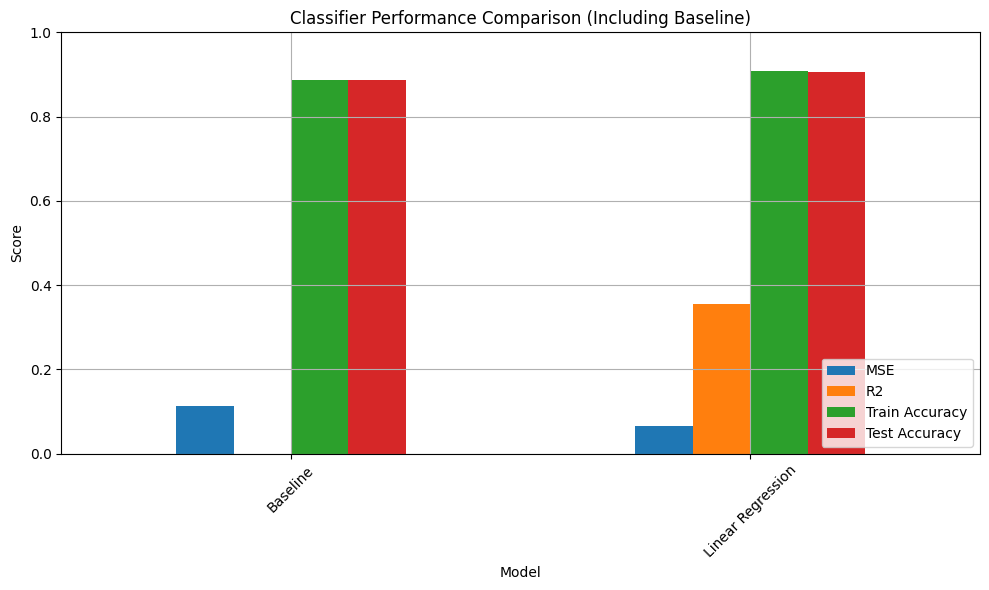

In [19]:
# plot results from comparing linear regression and baseline model
fig, ax = plt.subplots(figsize=(10, 6))
results_df.set_index("Model").plot(kind="bar", ax=ax)
plt.title("Classifier Performance Comparison (Including Baseline)")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [21]:
# import classifiers and define models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.base import clone
import time


models = {
    'Baseline': DummyClassifier(strategy="most_frequent"),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(kernel='linear')}

# evaluate each model
compare_results = []

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', clone(model))  # clone to ensure fresh instance
    ])

    start_time = time.time()
    pipeline.fit(X_train, y_train)
    end_time = time.time()

    train_accuracy = pipeline.score(X_train, y_train)
    test_accuracy = pipeline.score(X_test, y_test)

    compare_results.append({
        "Model": name,
        "Train Time": round(end_time - start_time, 2),
        "Train Accuracy": round(train_accuracy, 2),
        "Test Accuracy": round(test_accuracy, 2)
    })

# Create and sort DataFrame
compare_results_df = pd.DataFrame(compare_results)
compare_results_df.sort_values(by="Test Accuracy", ascending=False, inplace=True)
compare_results_df.reset_index(drop=True, inplace=True)

print(compare_results_df)

                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression        1.31            0.91           0.91
1                  SVM       43.75            0.90           0.90
2                  KNN        0.22            0.93           0.90
3             Baseline        0.17            0.89           0.89
4        Decision Tree        0.57            1.00           0.89


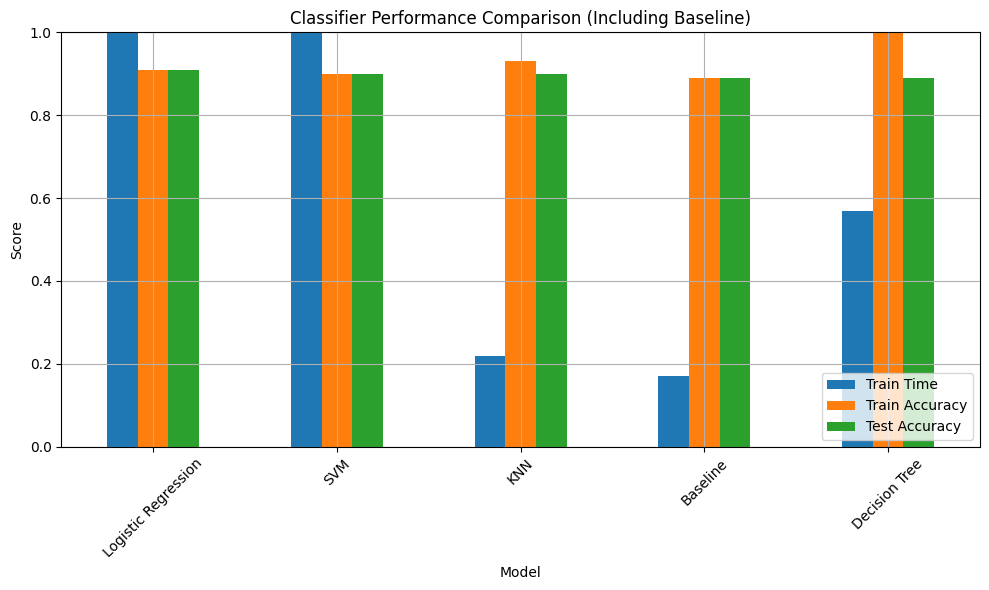

In [22]:
# plot results from comparing models
fig, ax = plt.subplots(figsize=(10, 6))
compare_results_df.set_index("Model").plot(kind="bar", ax=ax)
plt.title("Classifier Performance Comparison (Including Baseline)")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [ ]:
### BEGIN Kelly Write Up

## Summary of Initial Results <br/>

From comparing the performance of 5 classifiers, including the baseline model, the results show that Logistic Regression classifier performed the best. This determination was based on evaluating which model had the highest test accuracy. The bar chart above shows the best performing models in decending order from left to right (e.g., Linear Regression, SVM, KNN, Baseline, Decision Tree).

In [ ]:
### END Kelly Write Up

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Define models and their hyperparameter grids
model_params = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {
            'classifier__C': [0.01, 0.1, 1, 10],
            'classifier__solver': ['liblinear', 'lbfgs']
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            'classifier__n_neighbors': [3, 5, 7],
            'classifier__weights': ['uniform', 'distance'],
            'classifier__p': [1, 2]  # 1=Manhattan, 2=Euclidean
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(),
        "params": {
            'classifier__max_depth': [5, 10, 20, None],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__criterion': ['gini', 'entropy']
        }
    },
    "SVM": {
        "model": SVC(),
        "params": {
            'classifier__C': [0.1, 1, 10],
            'classifier__kernel': ['linear', 'rbf'],
            'classifier__gamma': ['scale', 'auto']
        }
    },
    "Baseline (Most Frequent)": {
        "model": DummyClassifier(strategy='most_frequent'),
        "params": {}  # No tuning
    }
}

# To store best estimators and their scores
best_models = []

# Run GridSearchCV for each model
for name, config in model_params.items():
    print(f"Tuning: {name}")

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', config['model'])
    ])

    grid = GridSearchCV(
        pipeline,
        param_grid=config['params'],
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )

    grid.fit(X_train, y_train)

    best_models.append({
        "Model": name,
        "Best Parameters": grid.best_params_,
        "Best CV Accuracy": round(grid.best_score_, 4),
        "Test Accuracy": round(grid.score(X_test, y_test), 4)
    })

# Display results and sort in a DataFrame
tuning_df = pd.DataFrame(best_models)
tuning_df.sort_values(by="Test Accuracy", ascending=False, inplace=True)
tuning_df.reset_index(drop=True, inplace=True)
print(tuning_df)

Tuning: Logistic Regression
Tuning: KNN
Tuning: Decision Tree
Tuning: SVM
Tuning: Baseline (Most Frequent)
                      Model  \
0             Decision Tree   
1                       SVM   
2       Logistic Regression   
3                       KNN   
4  Baseline (Most Frequent)   

                                     Best Parameters  Best CV Accuracy  \
0  {'classifier__criterion': 'gini', 'classifier_...            0.9135   
1  {'classifier__C': 1, 'classifier__gamma': 'sca...            0.9115   
2  {'classifier__C': 0.1, 'classifier__solver': '...            0.9113   
3  {'classifier__n_neighbors': 7, 'classifier__p'...            0.9014   
4                                                 {}            0.8876   

   Test Accuracy  
0         0.9151  
1         0.9118  
2         0.9114  
3         0.9042  
4         0.8865  


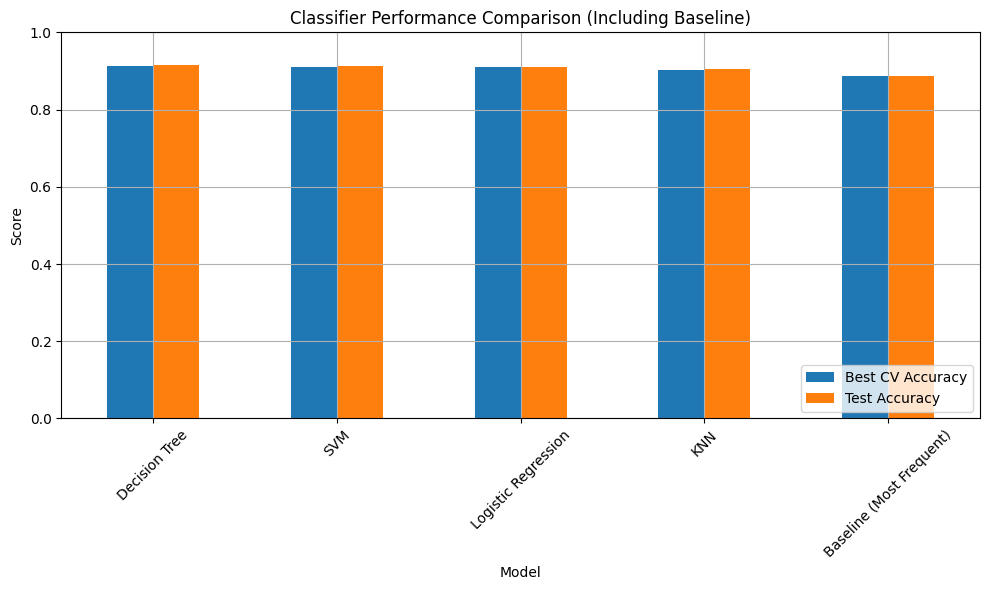

In [24]:
# plot results from comparing models
fig, ax = plt.subplots(figsize=(10, 6))
tuning_df.set_index("Model").plot(kind="bar", ax=ax)
plt.title("Classifier Performance Comparison (Including Baseline)")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [ ]:
### BEGIN Kelly Write Up

## Hyperparameter Tuning Results <br/>

After tuning the hyperparameters for each model, the best performing models ranked differently from the models before hyper-parameter tuning. Post-tuning, the best performing model is: <br/>


1.   Decision Tree with 91.51% Test accuracy, followed by
2.   Sequential Vector Machine with 91.18%
1.   Logistic Regression with 91.14%,
2.   K Nearest Neighbors with 90.42%, and lastly as expected,
1.   Baseline model with 88.65% Test accuracy

This exercise shows the significance and importance of tuning hyperparameters to improve the outcome of machine learning.

### Customer Recommendation

In addition, with Decision Tree as the classifier that performed the best, our team went on to rebuild the decision tree individually and extract the best features. The top 2 features with the higest importance scores:


1.   Duration (in seconds)
2.   Number of Employees

The Decision Tree algorithm predicts that longer duration of contact will increase the higher the likelihood of a potential buying customer by 44.87%. The classifier predicts that the second feature, number of employees, indicates that a higher number of employees will have a 24.85% likelihood that a customer would potentially buy. In other words, the algorithm recommends 1) focusing on increasing the duration of contact with a potential buying customer and 2) focusing on customers who work for companies with larger number of employees to improve the outcome of the marketing campaigns. <br/><br/>

The decision tree algorithm is provided to the customer for further analysis.

In [ ]:
### END Kelly Write Up

In [25]:
# Kelly Note: this section is a repeat of Problem 1-6
# to refresh data and re-do Decision Tree Classifier
# with discovery of best features for customer

# import libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# mount Kelly's Google Drive
from google.colab import drive
drive.mount('/content/drive')

# load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module17/module17_starter/data/bank-additional-full.csv', sep = ';')

# preprocess X and y

X = df.drop('y', axis=1) # define X and drop target column 'y'
y = df['y'] # define y

y = LabelEncoder().fit_transform(y) # encode target 'y' to yes=1, no=0

# preprocess numerical columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# preprocess categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

# use ColumnTransormer to transform both numerical and categorical columns
preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_columns),
    ('categorical', categorical_pipeline, categorical_columns)])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


           Feature  Importance
1         duration    0.448758
9      nr.employed    0.248510
7    cons.conf.idx    0.073165
8        euribor3m    0.063332
0              age    0.028417
3            pdays    0.020736
53       month_oct    0.016975
6   cons.price.idx    0.013128
2         campaign    0.009293
34      default_no    0.006207


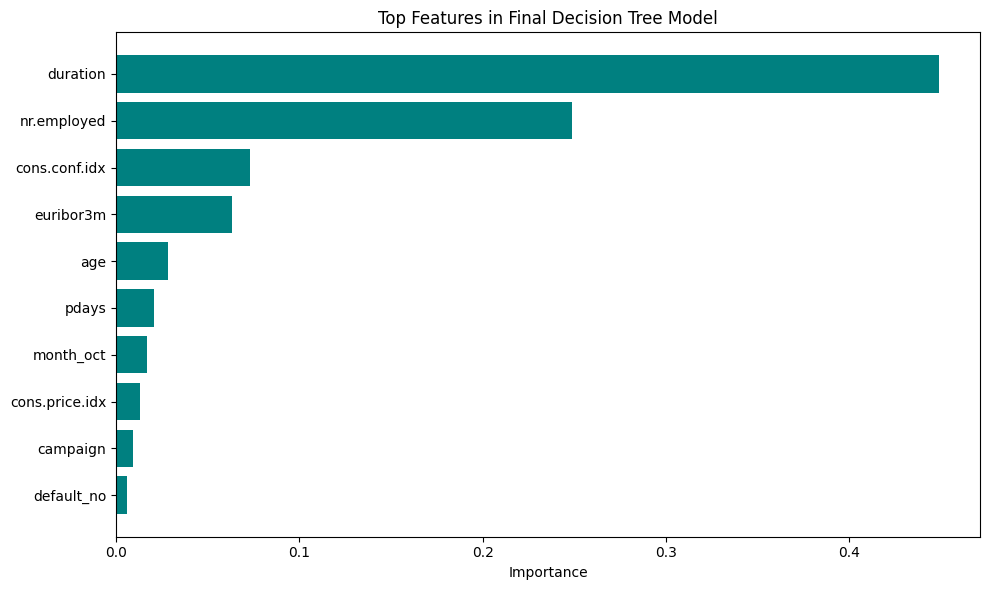

In [29]:
# refreshed test/train dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Best parameters from GridSearchCV (example values)
best_dt_params = {
    'max_depth': 10,
    'min_samples_split': 2,
    'criterion': 'entropy'
}

# Build the final Decision Tree pipeline
final_dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(**best_dt_params))
])

# Fit the model
final_dt_pipeline.fit(X_train, y_train)

# Access the trained decision tree classifier
dt_model = final_dt_pipeline.named_steps['classifier']

# Get feature names from preprocessing
ohe = final_dt_pipeline.named_steps['preprocessor'].named_transformers_['categorical'].named_steps['encoder']
cat_features = ohe.get_feature_names_out(categorical_columns)
all_features = np.concatenate([numerical_columns, cat_features])

# Get feature importances
importances = dt_model.feature_importances_
feature_importances = pd.DataFrame({
    'Feature': all_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display top features
top_features = feature_importances[feature_importances['Importance'] > 0].head(10)
print(top_features)

# Plot top features
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='teal')
plt.xlabel('Importance')
plt.title('Top Features in Final Decision Tree Model')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
### END OF ASSIGNMENT By Kelly Lieu